# Linear Regression

[![Build Status](https://travis-ci.org/joemccann/dillinger.svg?branch=master)](https://travis-ci.org/joemccann/dillinger)
  - Supervised Learning
  - Univariate vs Multi-variate
  - Linear regression, Linear Model,  Multiple Linear regression, multi-variable linear regression and Multivariate Linear regression.

To understand Linear Regression, we need to know what regression is; it is a type of supervised machine learning techniques where in the output variable is a real value, and based on dependent and independent variable we have to infer/regress.
Linear Regression is a supervised machine learning statistical technique wherein we use linear modelling approach to build relationship between dependent and independent variable. The technique is called simple linear regression if only one independent variable is analysed. But the term becomes Multiple Linear Regression( or multivariable linear regression)  if multiple independent variables are analysed. When multiple correlated dependent variables are predicted then its called multivariate linear regression.
The dependent variable is also called scalar response and independent variables are called explanatory variables. In linear regression we try and predict dependent variable and we are given with a data-set of independent variables.
Now let’s discuss the linear modelling approach with with Linear regression works.

To try and understand the linear models, let us consider a small data-set built with only one feature. And lets try and plot that on a graph to understand it better.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# For reproducibility
np.random.seed(1000)

# Number of samples
nb_samples = 200

In [2]:
# Create dataset
X = np.arange(-5, 5, 0.05)

Y = X + 2
Y += np.random.normal(0.0, 0.5, size=nb_samples)

In [3]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.scatter(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()

    plt.show()

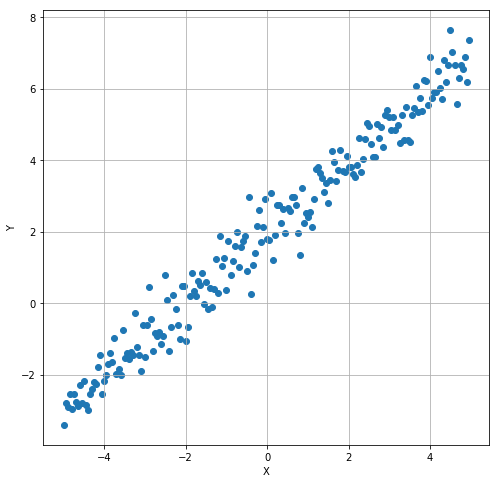

In [4]:
show_dataset(X, Y)

So from above we can see that the data follows a straight line, and we can model this regression function as y = x + 2 + n, as the n factor gives us the noise parameter, so its important, and in regression modeling finding the right model for your data is as import as find the loss function and trying to reduce it.
Lets try and reduce the loss function using gradient descent.
We can rewrite the above regression function as:

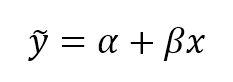

There are various approaches to write the loss function but we can use least square function as to find the best parameters
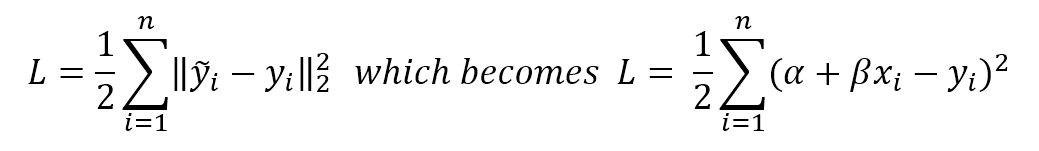
If we do partial differentiation on above term and try to determine the parameters we would get
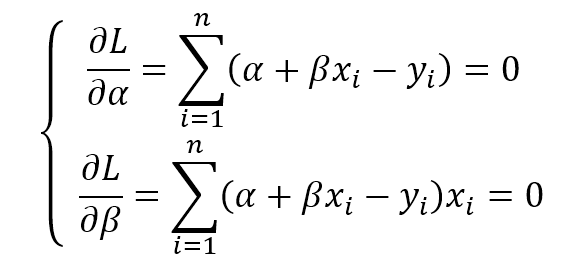

In [5]:
def loss(v):
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1]*X[i] - Y[i])
    return 0.5 * e


def gradient(v):
    g = np.zeros(shape=2)
    for i in range(nb_samples):
        g[0] += (v[0] + v[1]*X[i] - Y[i])
        g[1] += ((v[0] + v[1]*X[i] - Y[i]) * X[i])
    return g

In [6]:
# Minimize loss function
result = minimize(fun=loss, x0=np.array([0.0, 0.0]), jac=gradient, method='L-BFGS-B')
print(result)

      fun: 25.224432728145842
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.03369622e-07,  3.60194360e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 8
      nit: 7
   status: 0
  success: True
        x: array([1.96534464, 0.98451589])


In [7]:
print('Interpolating rect:')
print('y = %.2fx + %2.f' % (result.x[1], result.x[0]))

# Compute the absolute error
err = 0.0

for i in range(nb_samples):
    err += np.abs(Y[i] - (result.x[1]*X[i] + result.x[0]))

print('Absolute error: %.2f' % err)

# Repeat the process using the Moore-Penrose pseudo-inverse
Xs = np.expand_dims(X, axis=1)
Ys = np.expand_dims(Y, axis=1)
Xs = np.concatenate((Xs, np.ones_like(Xs)), axis=1)

result = np.linalg.inv(np.dot(Xs.T, Xs)).dot(Xs.T).dot(Y)

print('Interpolating rect:')
print('y = %.2fx + %2.f' % (result[0], result[1]))

# Compute the estimator covariance
covariance = (0.5 ** 2) * np.linalg.inv(np.dot(Xs.T, Xs))

print('Estimator covariance matrix:')
print(covariance)

Interpolating rect:
y = 0.98x +  2
Absolute error: 80.70
Interpolating rect:
y = 0.98x +  2
Estimator covariance matrix:
[[1.50003750e-04 3.75009375e-06]
 [3.75009375e-06 1.25009375e-03]]


In [8]:
####
#n-dim linear reg on boston dataset
####

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
# For reproducibility
np.random.seed(1000)

In [10]:
boston = load_boston()
print(boston.keys())

['data', 'feature_names', 'DESCR', 'target']


In [11]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [12]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["PRICE"] = boston.target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [13]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
def show_dataset(data):
    fig, ax = plt.subplots(4, 3, figsize=(20, 15))

    for i in range(4):
        for j in range(3):
            ax[i, j].plot(data.data[:, i + (j + 1) * 3])
            ax[i, j].grid()

    plt.show()

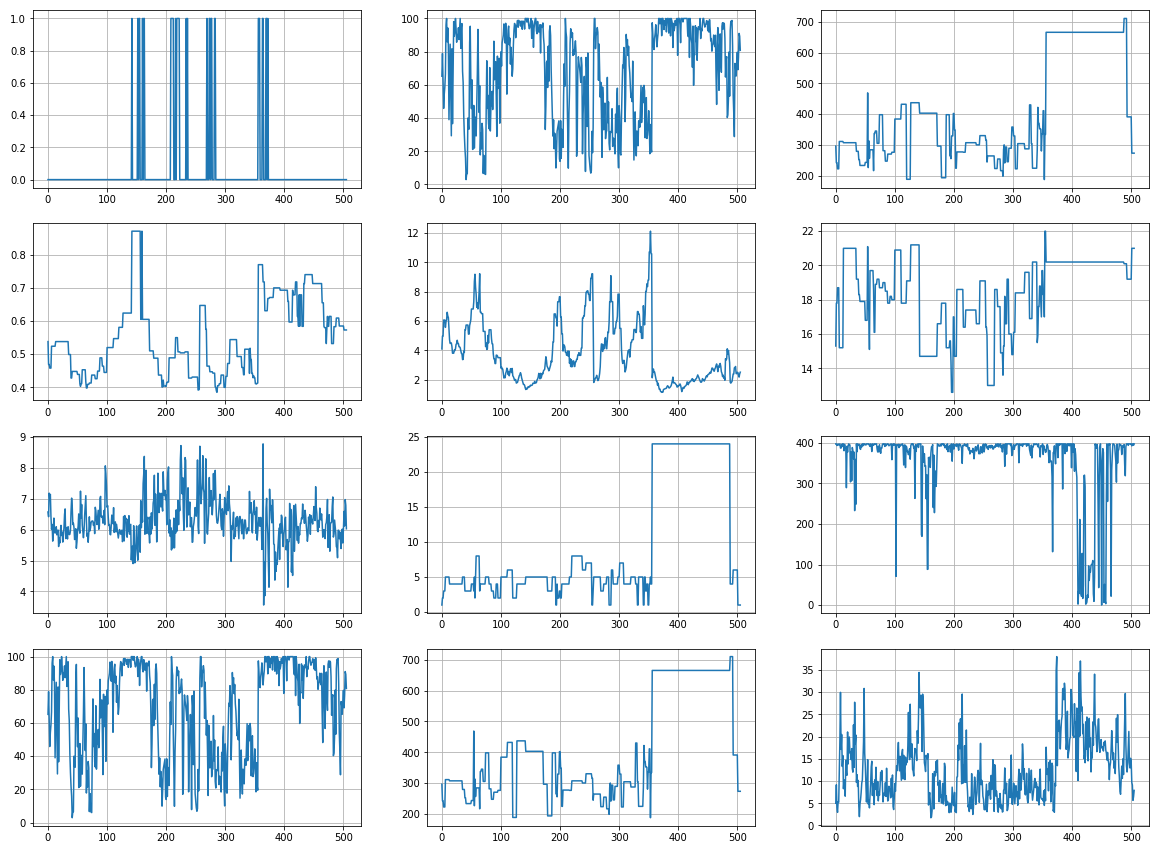

In [15]:
show_dataset(boston)

In [16]:
# Create a linear regressor instance
lr = LinearRegression(normalize=True)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.1)

# Train the model
lr.fit(X_train, Y_train)

print('Score %.3f' % lr.score(X_test, Y_test))

Score 0.693


In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, boston.data, boston.target, cv=7, scoring='neg_mean_squared_error')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ -11.32601065  -10.96365388  -32.12770594  -33.62294354  -10.55957139
 -146.42926647  -12.98538412]
Accuracy: -36.86 (+/- 45.70)


In [18]:
r2_scores = cross_val_score(lr, boston.data, boston.target, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: -36.86 (+/- 45.70)


In [19]:
ev_scores = cross_val_score(lr, boston.data, boston.target, cv=10, scoring='explained_variance')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: -36.86 (+/- 45.70)


In [20]:
####
#regularization
####

In [21]:
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

In [22]:
diabetes = load_diabetes()

# Create a linear regressor and compute CV score
lr = LinearRegression(normalize=True)
lr_scores = cross_val_score(lr, diabetes.data, diabetes.target, cv=10)
print('Linear regression CV average score: %.6f' % lr_scores.mean())

Linear regression CV average score: 0.461962


###### Ridge Regularization   
The regularisation term or the penalty is added to the model which is the function of square of coefficient of parameters. This is also called as L2 form of regularisation. During the regularisation process the coefficient of parameters can approach to zero, but can never be zero.

In [23]:
# Create a Ridge regressor and compute CV score
rg = Ridge(0.05, normalize=True)
rg_scores = cross_val_score(rg, diabetes.data, diabetes.target, cv=10)
print('Ridge regression CV average score: %.6f' % rg_scores.mean())

# Find the optimal alpha value for Ridge regression
rgcv = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.001, 0.005, 0.0025, 0.001, 0.00025), normalize=True)
rgcv.fit(diabetes.data, diabetes.target)
print('Ridge optimal alpha: %.3f' % rgcv.alpha_)

Ridge regression CV average score: 0.463439
Ridge optimal alpha: 0.005


Lasso Regularization – The regularisation term or the penalty is added to the model which is the function of absolute value of coefficient of parameters. This is also called as L1 form of regularisation. During the regularisation process the coefficient of parameters can be driven to zero. This technique is used for feature selection and generating more parsimonious model.
Let’s rewrite the loss function(least mean square)

In [24]:
# Create a Lasso regressor and compute CV score
ls = Lasso(0.01, normalize=True)
ls_scores = cross_val_score(ls, diabetes.data, diabetes.target, cv=10)
print('Lasso regression CV average score: %.6f' % ls_scores.mean())


# Find the optimal alpha value for Lasso regression
lscv = LassoCV(alphas=(1.0, 0.1, 0.01, 0.001, 0.005, 0.0025, 0.001, 0.00025), normalize=True)
lscv.fit(diabetes.data, diabetes.target)
print('Lasso optimal alpha: %.3f' % lscv.alpha_)

Lasso regression CV average score: 0.461741
Lasso optimal alpha: 0.010


In [25]:
# Create ElasticNet regressor and compute CV score
en = ElasticNet(alpha=0.001, l1_ratio=0.8, normalize=True)
en_scores = cross_val_score(en, diabetes.data, diabetes.target, cv=10)
print('ElasticNet regression CV average score: %.6f' % en_scores.mean())


# Find the optimal alpha and l1_ratio for Elastic Net
encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8), normalize=True)
encv.fit(diabetes.data, diabetes.target)
print('ElasticNet optimal alpha: %.3f and L1 ratio: %.4f' % (encv.alpha_, encv.l1_ratio_))

ElasticNet regression CV average score: 0.463589
ElasticNet optimal alpha: 0.001 and L1 ratio: 0.7500


In [26]:
####
#RANSAC
####

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, RANSACRegressor


# For reproducibility
np.random.seed(1000)

nb_samples = 200
nb_noise_samples = 150

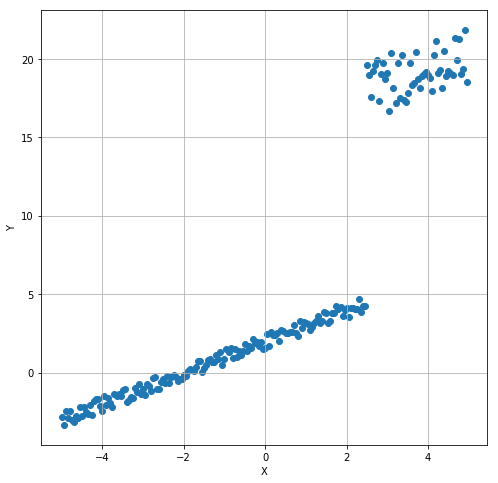

In [28]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.scatter(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()
    plt.show()

# Create dataset
X = np.arange(-5, 5, 0.05)

Y = X + 2
Y += np.random.uniform(-0.5, 0.5, size=nb_samples)

for i in range(nb_noise_samples, nb_samples):
    Y[i] += np.random.uniform(12, 15)

# Show the dataset
show_dataset(X, Y)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))
print(lr.intercept_)
print(lr.coef_)

[5.36902167]
[[2.49585599]]


In [30]:
from sklearn.linear_model import RANSACRegressor
rs = RANSACRegressor(lr)
rs.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))
print(rs.estimator_.intercept_)
print(rs.estimator_.coef_)

[1.99772335]
[[1.00284149]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# For reproducibility
np.random.seed(1000)

nb_samples = 200

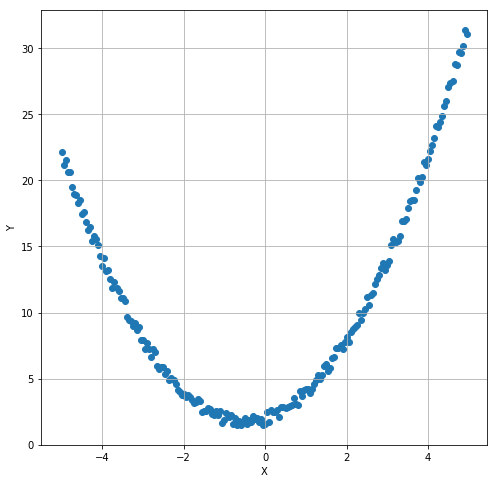

In [32]:
# Create dataset
X = np.arange(-5, 5, 0.05)

Y = X + 2
Y += X**2 + np.random.uniform(-0.5, 0.5, size=nb_samples)
# Show the dataset
show_dataset(X, Y)

In [33]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(-1, 1), Y.reshape(-1, 1), test_size=0.25)
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)
print('Linear regression score: %.3f' % lr.score(X_train, Y_train))

Linear regression score: 0.120


In [34]:
# Create polynomial features
pf = PolynomialFeatures(degree=2)
X_train = pf.fit_transform(X_train)
X_test = pf.fit_transform(X_test)
lr.fit(X_train, Y_train)
print('Second degree polynomial regression score: %.3f' % lr.score(X_train, Y_train))

Second degree polynomial regression score: 0.999


In [35]:
####
#PolynomialFeatures vs SelectFromModel
####

In [36]:
from sklearn.feature_selection import SelectFromModel
boston = load_boston()
pf = PolynomialFeatures(degree=2)
Xp = pf.fit_transform(boston.data)
Xp.shape

(506, 105)

In [37]:
lr = LinearRegression(normalize=True)
lr.fit(Xp, boston.target)
lr.score(Xp, boston.target)

0.9173466004730231

In [38]:
sm = SelectFromModel(lr, threshold=10)
Xt = sm.fit_transform(Xp, boston.target)
sm.estimator_.score(Xp, boston.target)

0.9173466004730231

In [39]:
Xt.shape

(506, 8)

In [40]:
####
#Isotonic regression
####

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.isotonic import IsotonicRegression
# For reproducibility
np.random.seed(1000)
nb_samples = 100

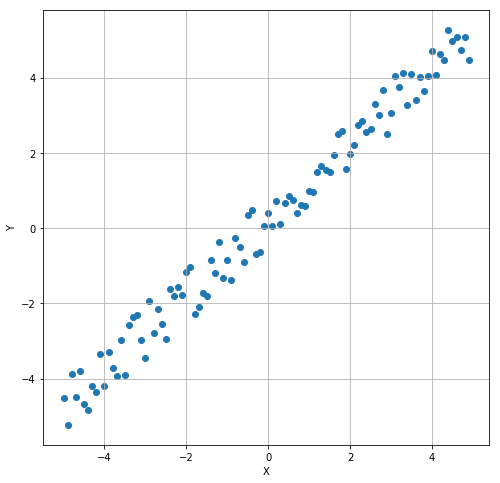

In [42]:
# Create dataset
X = np.arange(-5, 5, 0.1)
Y = X + np.random.uniform(-0.5, 1, size=X.shape)
# Show original dataset
show_dataset(X, Y)

In [43]:
# Create an isotonic regressor
ir = IsotonicRegression(-6, 10)
Yi = ir.fit_transform(X, Y)

# Create a segment list
segments = [[[i, Y[i]], [i, Yi[i]]] for i in range(nb_samples)]

In [44]:
def show_isotonic_regression_segments(X, Y, Yi, segments):
    lc = LineCollection(segments, zorder=0)
    lc.set_array(np.ones(len(Y)))
    lc.set_linewidths(0.5 * np.ones(nb_samples))

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.plot(X, Y, 'b.', markersize=8)
    ax.plot(X, Yi, 'g.-', markersize=8)
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

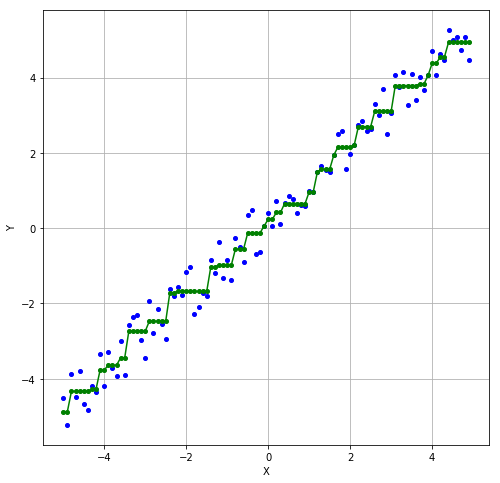

In [45]:
# Show isotonic interpolation
show_isotonic_regression_segments(X, Y, Yi, segments)

# Classification

Unlike regression, where a continuous input is modelled against a continuous target variable y, in classification the input variable x is modeled against a target variable which is always discrete.
A Linear Classifier is a classification algorithm that makes classification based on a linear predictor function taking input vector x and the weights of these as feature to predict the class.
Linear predictor function or Linear models uses decision boundaries for classification that separate input vectors into classes, these decision boundaries can be a line, or a hyper-plane depending upon the input vector size.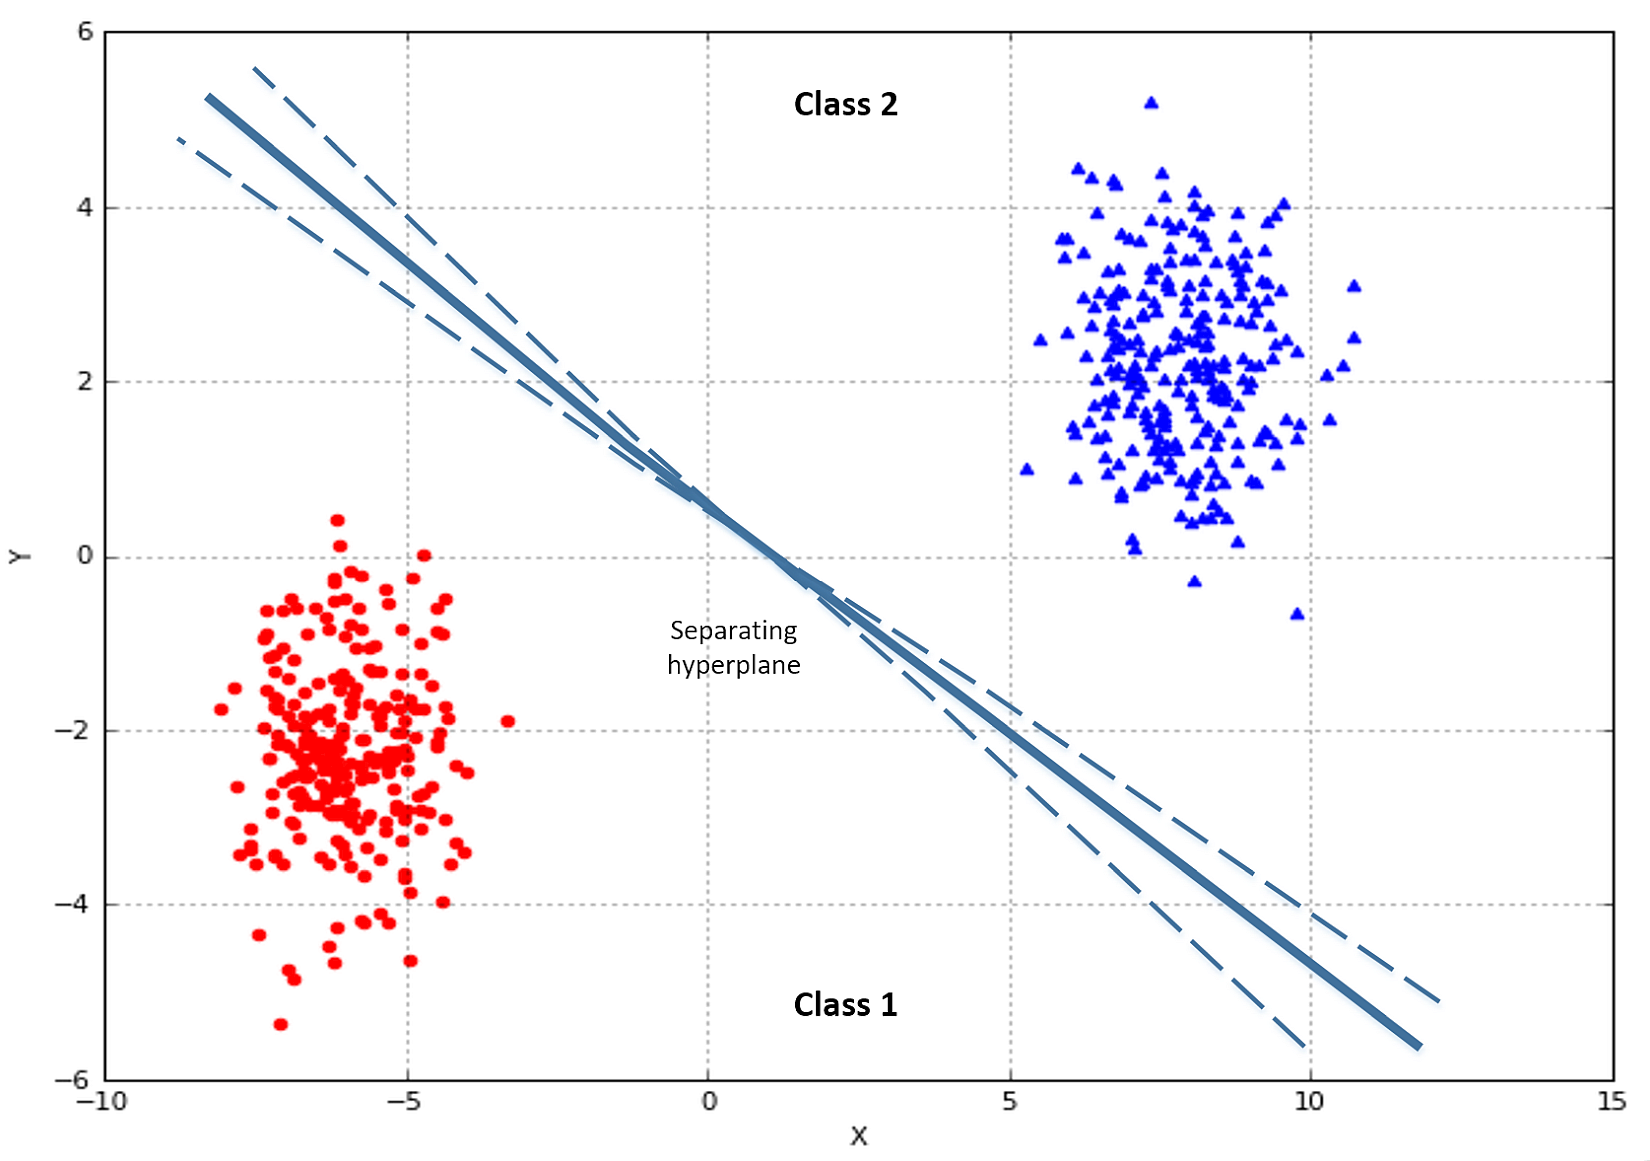

In [46]:
####
#Logistic Regression
####

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
# For reproducibility
np.random.seed(1000)
nb_samples = 500

In [48]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
    plt.show()


def show_classification_areas(X, Y, lr):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.abs(Y - 1), edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

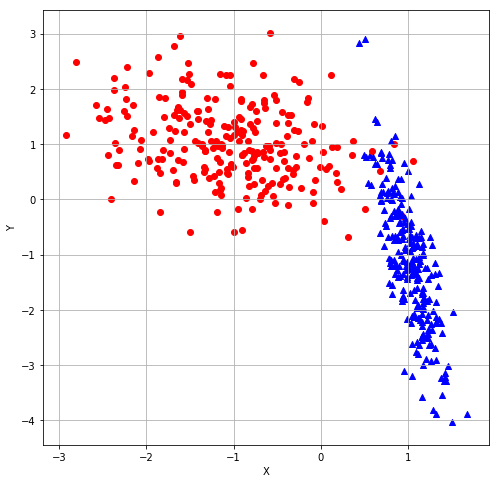

Logistic regression score: 0.992


In [49]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Create logistic regressor
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % lr.score(X_test, Y_test))

### Logistic Regression
Logistic regression as the name implies is a regression but it is used as a binary classifier, in other words instead of predicting exactly 0 or 1, logistic regression generates a probability—a value between 0 and 1, exclusive. For example, let’s consider a logistic regression model for spam detection. If the model infers a value of 0.932 on a particular email message, it implies a 93.2% probability that the email message is spam. More precisely, it means that in the limit of infinite training examples, the set of examples for which the model predicts 0.932 will actually be spam 93.2% of the time and the remaining 6.8% will not. So basically, it is used when the dependent variable(target) is categorical.
Logistic Regression in linear modelling works for both binary classifications as well as for multiple labels in the form of multinomial logistic regression. Logistic regression is a regression model (technically) in which the dependent variable is categorical (e.g., "classification”). The binary logistic model is used to estimate the probability of a binary response based on a set of one or more input variables (independent variables or “features”). This output is the statistical probability of a category, given certain input predictors.
Logistic regression derives it name from use of sigmoid function(or logistic function) which is given as 
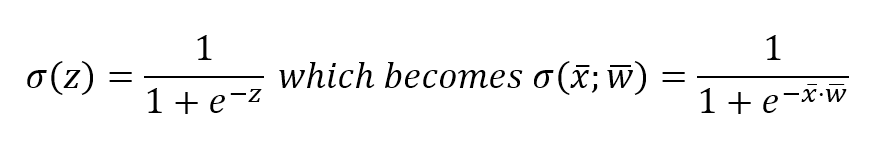
where  z is b + w1x1 + w2x2 + ... wNxN and w are weights/bias which model learns and x feature values.
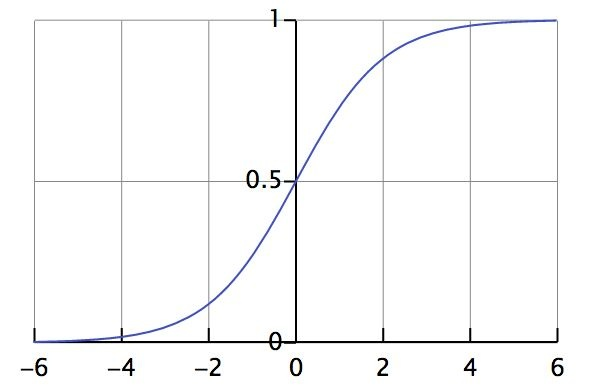

Logistic regression CV average score: 0.980


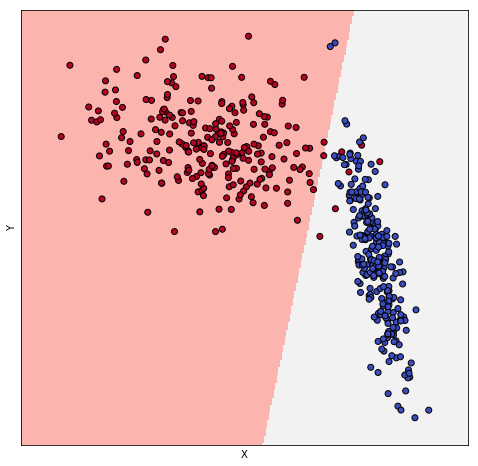

In [50]:
# Compute CV score
lr_scores = cross_val_score(lr, X, Y, scoring='accuracy', cv=10)
print('Logistic regression CV average score: %.3f' % lr_scores.mean())

# Show classification areas
show_classification_areas(X, Y, lr)

In [51]:
print(lr.intercept_)
print(lr.coef_)

[-0.99680047]
[[ 4.16009163 -0.58982891]]


### SGD (Stocgastic Grdient Descent)
To understand Stochastic gradient descent algorithms, we should first focus on what each term mean in Stochastic gradient descent, the gradient descent is briefly described in previous chapters, but let’s look at it clearly first.
To understand gradient descent we need to know what is iterative learning, and how iterative learning is useful in machine learning. Iterative learning is mainly used to reduce loss, here we start with a wild guess ("The value of is 0.") and wait for the system to tell you what the loss is. Then, you'll try another guess ("The value of is 0.5.") and see what the loss is. The real trick is to find the best possible model as efficiently as possible.
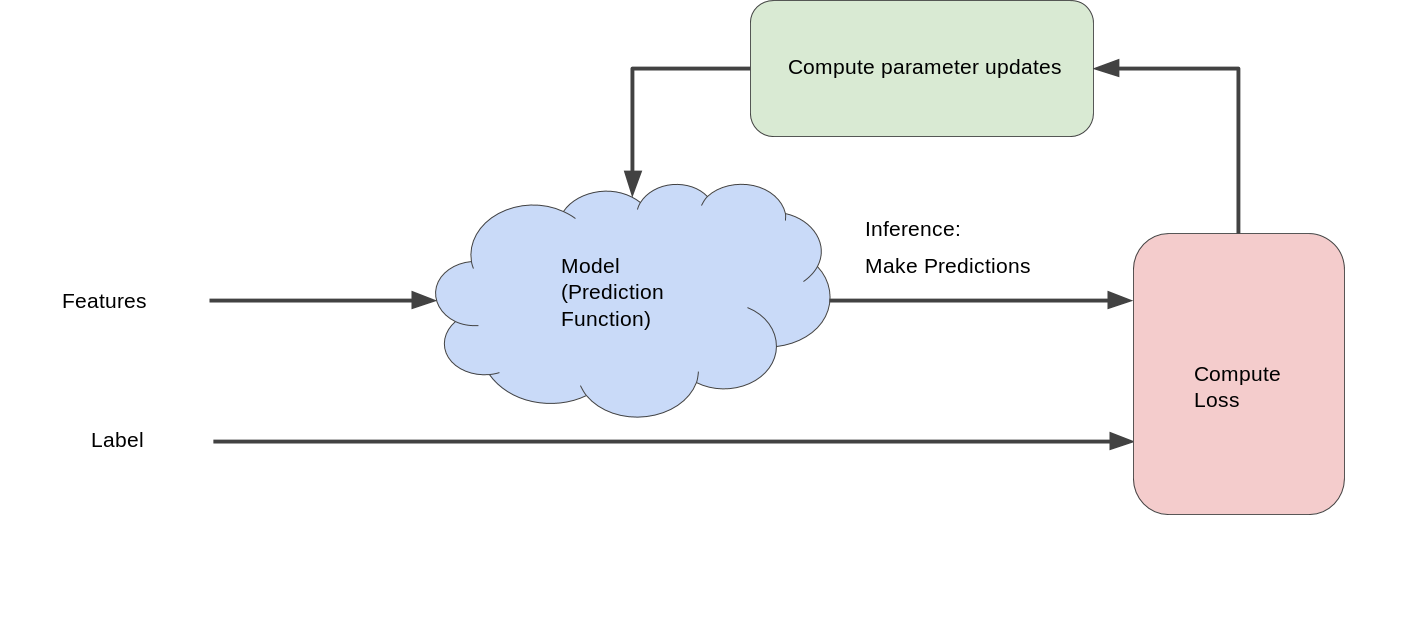

In [52]:
####
#Stochastic Gradient Descent
####

In [53]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# For reproducibility
np.random.seed(1000)
nb_samples = 500

In [54]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()


terative strategies are prevalent in machine learning, primarily because they scale so well to large data sets. 
The "model" takes one or more features as input and returns one prediction (y') as output. To simplify, consider a model that takes one feature and returns one prediction:
y' = b + w1x1
What initial values should we set for linear regression problems, it turns out that the starting values aren't important. We could pick random values, but we'll just take the following trivial values instead:
    - b = 0
    - w = 0 
Suppose that the first feature value is 10. Plugging that feature value into the prediction function yields:
  y' = 0 + 0(10)
  y' = 0
The "Compute Loss" part of the diagram is the loss function that the model will use. Suppose we use the squared loss function. The loss function takes in two input values:
    - y': The model's prediction for features x
    - y: The correct label corresponding to features x.
At last, we've reached the "Compute parameter updates" part of the diagram. It is here that the machine learning system examines the value of the loss function and generates new values for b and w1. For now, just assume that this mysterious box devises new values and then the machine learning system re-evaluates all those features against all those labels, yielding a new value for the loss function, which yields new parameter values. And the learning continues iterating until the algorithm discovers the model parameters with the lowest possible loss. Usually, we iterate until overall loss stops changing or at least changes extremely slowly. When that happens, we say that the model has converged.
Now let’s replace "Compute parameter updates" with something more substantial, suppose we had the time and the computing resources to calculate the loss for all possible values of w1. For the kind of regression problems we've been examining, the resulting plot of loss vs. w1 will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:
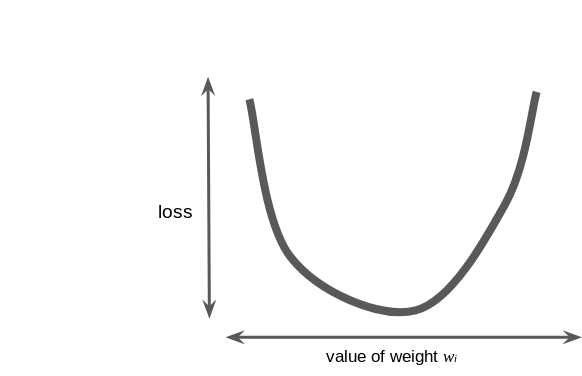
Convex problems have only one minimum; that is, only one place where the slope is exactly 0. That minimum is where the loss function converges.
Calculating the loss function for every conceivable value of w1 over the entire data set would be an inefficient way of finding the convergence point. Let's examine a better mechanism—very popular in machine learning—called gradient descent.
The first stage in gradient descent is to pick a starting value (a starting point) for w1. The starting point doesn't matter much; therefore, many algorithms simply set w1 to 0 or pick a random value. The following figure shows that we've picked a starting point slightly greater than 0.


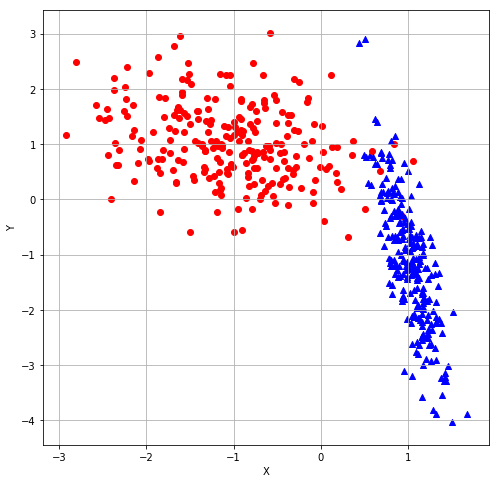

In [55]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

The gradient descent algorithm then calculates the gradient of the loss curve at the starting point. Here in above Figure, the gradient of loss is equal to the derivative (slope) of the curve. When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.
Note that a gradient is a vector, so it has both of the following characteristics:
    - a direction
    - a magnitude
The gradient always points in the direction of steepest increase in the loss function. The gradient descent algorithm takes a step in the direction of the negative gradient in order to reduce loss as quickly as possible.

As noted, the gradient vector has both a direction and a magnitude. Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.
Hyperparameters are the knobs that programmers tweak in machine learning algorithms.
Most machine learning programmers spend a fair amount of time tuning the learning rate. If you pick a learning rate that is too small, learning will take too long.
Conversely, if you specify a learning rate that is too large, the next point will perpetually bounce haphazardly across the bottom of the well like a quantum mechanics experiment gone horribly wrong.
There's a Goldilocks learning rate for every regression problem. The Goldilocks value is related to how flat the loss function is. If you know the gradient of the loss function is small then you can safely try a larger learning rate, which compensates for the small gradient and results in a larger step size.

The ideal learning rate in one-dimension is 1/f(x)'' (the inverse of the second derivative of f(x) at x).
The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives). The story for general convex functions is more complex.
Since now we have learnt what gradient descent is and how it governs the iterative learning, we will now focus on stochastic gradient descent, what is it and how it increases the efficiency of learning model.
In gradient descent, a batch is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. When working at large scale, data sets often contain billions or even hundreds of billions of examples. Furthermore, large data sets often contain huge numbers of features. Consequently, a batch can be enormous. A very large batch may cause even a single iteration to take a very long time to compute.
A large data set with randomly sampled examples probably contains redundant data. In fact, redundancy becomes more likely as the batch size grows. Some redundancy can be useful to smooth out noisy gradients, but enormous batches tend not to carry much more predictive value than large batches.
What if we could get the right gradient on average for much less computation? By choosing examples at random from our data set, we could estimate (albeit, noisily) a big average from a much smaller one. Stochastic gradient descent (SGD) takes this idea to the extreme--it uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random. The idea behind stochastic gradient descent is iterating a weight update based on the gradient of loss function: w^(τ + 1) = w^(τ) − η∇L(w)

where τ denotes the iteration number, and η is a learning rate parameter, a parameter that can be constant or decayed while the learning process proceeds, L is the loss function we want to minimize.
The learning_rate parameter can be also left with its default value (optimal), which is computed internally according to the regularization factor. The process should end when the weights stop modifying or their variation keeps itself under a selected threshold. The scikit-learn implementation uses the n_iter parameter to define the number of desired iterations.
There are many possible loss functions, but in this chapter, we consider only log and perceptron. Some of the other ones will be discussed in the next chapters. The former implements a logistic regression, while the latter (which is also available as the autonomous class Perceptron) is the simplest neural network, composed of a single layer of weights w, a fixed constant called bias, and a binary output function.
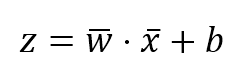
The output function (which classifies in two classes) is: 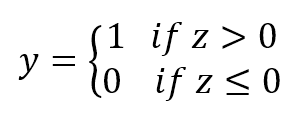
The differences between a Perceptron and a LogisticRegression are the output function (sign versus sigmoid) and the training model (with the loss function). A perceptron, in fact, is normally trained by minimizing the mean square distance between the actual value and prediction:
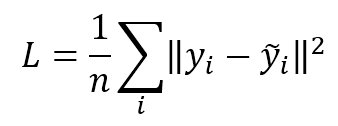
Just like any other linear classifier, a perceptron is not able to solve nonlinear problems, hence, our example will be generated using the built-in function make_classification.

In [56]:
# Create perceptron as SGD instance
# The same result can be obtained using directly the class sklearn.linear_model.Perceptron
sgd = SGDClassifier(loss='perceptron', learning_rate='optimal', n_iter=10)
sgd_scores = cross_val_score(sgd, X, Y, scoring='accuracy', cv=10)
print('Perceptron CV average score: %.3f' % sgd_scores.mean())

Perceptron CV average score: 0.980


/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/v

In [57]:
from sklearn.linear_model import Perceptron
perc = Perceptron(n_iter=10)
cross_val_score(perc, X, Y, scoring='accuracy', cv=10).mean()
0.98195918367346935

/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/projects/v

0.9819591836734693

In [58]:
####
#Grid Search on LogisticRegression
####

In [59]:
import numpy as np
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# For reproducibility
np.random.seed(1000)

In [60]:
# Load dataset
iris = load_iris()

In [61]:
# Define a param grid
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.5, 1.0, 1.5, 1.8, 2.0, 2.5]
    }
]

# Create and train a grid search
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(iris.data, iris.target)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=12,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.5, 1.0, 1.5, 1.8, 2.0, 2.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
# Best estimator
print(gs.best_estimator_)

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [63]:
gs_scores = cross_val_score(gs.best_estimator_, iris.data, iris.target, scoring='accuracy', cv=10)
print('Best estimator CV average score: %.3f' % gs_scores.mean())

Best estimator CV average score: 0.967


In [64]:
####
#Grid Search on perceptron
####

In [65]:
import numpy as np
import multiprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import SGDClassifier

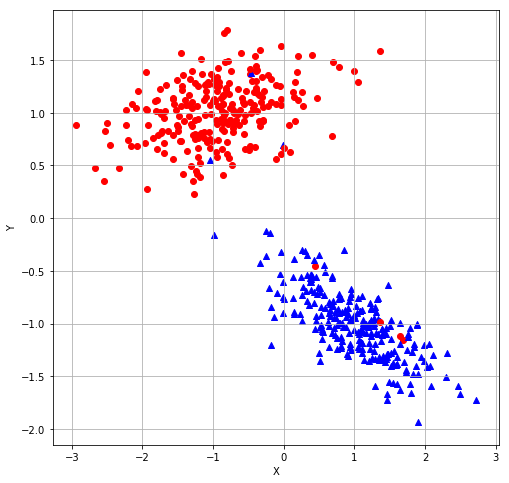

In [67]:
# For reproducibility
np.random.seed(100)
nb_samples = 500
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

In [68]:
# Define a param grid
param_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'alpha': [1e-5, 1e-4, 5e-4, 1e-3, 2.3e-3, 5e-3, 1e-2],
        'l1_ratio': [0.01, 0.05, 0.1, 0.15, 0.25, 0.35, 0.5, 0.75, 0.8]
    }
]

# Create SGD classifier
sgd = SGDClassifier(loss='perceptron', learning_rate='optimal')

In [69]:
# Create and train a grid search
gs = GridSearchCV(estimator=sgd, param_grid=param_grid, scoring='accuracy', cv=10,
                  n_jobs=multiprocessing.cpu_count())
gs.fit(X,Y)

# Best estimator
print(gs.best_estimator_)

gs_scores = cross_val_score(gs.best_estimator_, iris.data, iris.target, scoring='accuracy', cv=10)
print('Best estimator CV average score: %.3f' % gs_scores.mean())

/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/hom

SGDClassifier(alpha=0.005, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.25,
       learning_rate='optimal', loss='perceptron', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Best estimator CV average score: 0.747


/home/projects/virt-py/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [71]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report


# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [72]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=1000)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

In [73]:
# Create and train logistic regressor
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
print('Accuracy score: %.3f' % accuracy_score(Y_test, lr.predict(X_test)))
print('Zero-one loss (normalized): %.3f' % zero_one_loss(Y_test, lr.predict(X_test)))
print('Zero-one loss (unnormalized): %.3f' % zero_one_loss(Y_test, lr.predict(X_test), normalize=False))
print('Jaccard similarity score: %.3f' % jaccard_similarity_score(Y_test, lr.predict(X_test)))

# Compute confusion matrix
cm = confusion_matrix(y_true=Y_test, y_pred=lr.predict(X_test))
print('Confusion matrix:')
print(cm[::-1, ::-1])

print('Precision score: %.3f' % precision_score(Y_test, lr.predict(X_test)))
print('Recall score: %.3f' % recall_score(Y_test, lr.predict(X_test)))
print('F-Beta score (1): %.3f' % fbeta_score(Y_test, lr.predict(X_test), beta=1))
print('F-Beta score (0.75): %.3f' % fbeta_score(Y_test, lr.predict(X_test), beta=0.75))
print('F-Beta score (1.25): %.3f' % fbeta_score(Y_test, lr.predict(X_test), beta=1.25))
print('Cohen-Kappa score: %.3f' % cohen_kappa_score(Y_test, lr.predict(X_test)))

# Print the classification report
print('\n\nClassification report:')
print(classification_report(Y_test, lr.predict(X_test)))

Accuracy score: 0.968
Zero-one loss (normalized): 0.032
Zero-one loss (unnormalized): 4.000
Jaccard similarity score: 0.968
Confusion matrix:
[[61  1]
 [ 3 60]]
Precision score: 0.953
Recall score: 0.984
F-Beta score (1): 0.968
F-Beta score (0.75): 0.964
F-Beta score (1.25): 0.972
Cohen-Kappa score: 0.936


Classification report:
             precision    recall  f1-score   support

          0       0.98      0.95      0.97        63
          1       0.95      0.98      0.97        62

avg / total       0.97      0.97      0.97       125



In [ ]:
####
#ROC
####

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
# For reproducibility
np.random.seed(100)
nb_samples = 500

In [81]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1)
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [82]:
#Create and train logistic regressor
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
# Compute ROC curve
Y_score = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

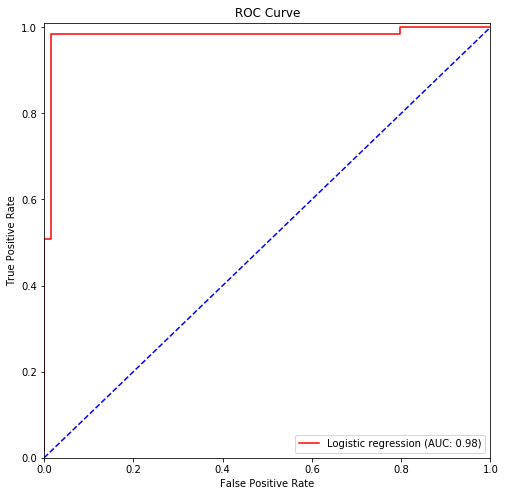

In [86]:
plt.figure(figsize=(8, 8))

plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [85]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9795081967213115